# 📊 IPL Exploratory Data Analysis (EDA) Project

This project performs an exploratory data analysis on IPL data from 2008 to 2024. It utilizes Python libraries like `pandas`, `matplotlib`, `seaborn`, and `plotly` to gain insights and perform visual storytelling.  
We cover:

- Run trends across seasons  
- Batting styles (Anchor vs Aggressive)  
- Bowling consistency  
- Overs-based performance  
- Venue comparisons  
- Match-winner prediction (optional)

## 🧰 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## 📚 Loading IPL Datasets

In [2]:
ball_df = pd.read_csv("IPL_BallByBall2008_2024_Updated.csv")
teams_df = pd.read_csv("ipl_teams_2024_info.csv")
players_df = pd.read_csv("Players_Info_2024.csv")
team_perf_df = pd.read_csv("team_performance_dataset_2008to2024.csv")

## 🔍 **Data Overview**

In this section, we take a closer look at the structure and contents of the IPL datasets — including the number of records, column types, and any potential null values. This helps us prepare for further analysis and cleaning.

In [3]:
print("📋 Ball-by-Ball Data:")
display(ball_df.head())

print("\n📋 Teams Info:")
display(teams_df.head())

print("\n📋 Players Info:")
display(players_df.head())

print("\n📋 Team Performance Summary:")
display(team_perf_df.head())

📋 Ball-by-Ball Data:


,Match id,Date,Season,Batting team,Bowling team,Innings No,Ball No,Bowler,Striker,Non Striker,runs_scored,extras,type of extras,score,score/wicket,wicket_confirmation,wicket_type,fielders_involved,Player Out
0,335982,18/04/2008,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0.1,P Kumar,SC Ganguly,BB McCullum,0,1,legbyes,1,1/0,0,NaN,NaN,NaN
1,335982,18/04/2008,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0.2,P Kumar,BB McCullum,SC Ganguly,0,0,NaN,1,1/0,0,NaN,NaN,NaN
2,335982,18/04/2008,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0.2,P Kumar,BB McCullum,SC Ganguly,0,1,wides,2,2/0,0,NaN,NaN,NaN
3,335982,18/04/2008,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0.3,P Kumar,BB McCullum,SC Ganguly,0,0,NaN,2,2/0,0,NaN,NaN,NaN
4,335982,18/04/2008,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0.4,P Kumar,BB McCullum,SC Ganguly,0,0,NaN,2,2/0,0,NaN,NaN,NaN



📋 Teams Info:


,Team Full Name,Team Captain (Current),Team Coach (Current),Team Home Ground (Current),Number of IPL Titles,Team Owners,Team About
0,Chennai Super Kings,MS Dhoni,Stephen Fleming,"MA Chidambaram Stadium, Chennai","5 (2010, 2011, 2018, 2021, 2023)",Chennai Super Kings Cricket Ltd (subsidiary of...,"The most consistent IPL franchise ever, Chenna..."
1,Delhi Capitals,Rishabh Pant,Ricky Ponting,"Arun Jaitley Stadium, New Delhi",0,"GMR Sports Pvt Ltd, JSW Sports Pvt Ltd",Delhi Capitals (earlier Daredevils) stumbled i...
2,Gujarat Titans,Shubman Gill,Ashish Nehra,"Narendra Modi Stadium, Ahmedabad",1 (2022),CVC Capital Partners,Gujarat Titans were one of two new teams intro...
3,Kolkata Knight Riders,Shreyas Iyer,Chandrakant Pandit,"Eden Gardens, Kolkata","2 (2012, 2014)",Knight Riders Sports Private Ltd,One of three teams to have won more than one I...
4,Lucknow Super Giants,KL Rahul,Justin Langer,"BR SABV Ekana Cricket Stadium, Lucknow",0,RPSG Group,"Lucknow Super Giants, one of the two new teams..."



📋 Players Info:


,Player Name,Team Name,Player Nationality,Date of Birth,Player Role,IPL Debut,About,Batting Style,Bowling Style,Player Salary
0,MS Dhoni,CSK,Indian,7-Jul-81,Wicketkeeper Batter,2008.0,"Mahendra Singh Dhoni, popularly known as MS Dh...",Right hand Bat,Right arm Medium,₹12crore(US$1.5 million)
1,Devon Conway,CSK,South African,8-Jul-91,Wicketkeeper Batter,2022.0,"Sorry, but I couldn't find any information on ...",Left hand Bat,Right arm Medium,"₹1crore(US$130,000)"
2,Ruturaj Gaikwad,CSK,Indian,31-Jan-97,Batter,2020.0,Certainly! Ruturaj Gaikwad is an emerging tale...,Right hand Bat,Right arm Offbreak,"₹6crore(US$750,000)"
3,Ajinkya Rahane,CSK,Indian,6-Jun-88,Top order Batter,2008.0,Ajinkya Rahane is an Indian professional crick...,Right hand Bat,Right arm Medium,"₹50lakh(US$63,000)"
4,Shaik Rasheed,CSK,Indian,24-Sep-04,Batter,NaN,Sure! Shikhar Dhawan is an Indian cricketer wh...,Right hand Bat,Legbreak,"₹20lakh(US$25,000)"



📋 Team Performance Summary:


,Match_ID,Date,Teams,Venue,Toss_Winner,Toss_Decision,Match_Winner,Win_Type,Win_Margin,First_Innings_Score,Second_Innings_Score,Player_of_Match,Umpire,Umpire1,Umpire2,Powerplay_Scores,Middle_Overs_Scores,Death_Overs_Scores
0,335982,2008-04-18,Royal Challengers Bangalore vs Kolkata Knight ...,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,222,82.0,BB McCullum,Asad Rauf,RE Koertzen,J Srinath,61,97,64
1,335983,2008-04-19,Kings XI Punjab vs Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,240,207.0,MEK Hussey,MR Benson,SL Shastri,S Venkataraghavan,53,116,71
2,335984,2008-04-19,Delhi Daredevils vs Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,129,132.0,MF Maharoof,Aleem Dar,GA Pratapkumar,GR Viswanath,40,66,23
3,335985,2008-04-20,Mumbai Indians vs Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,165,166.0,MV Boucher,SJ Davis,DJ Harper,J Srinath,47,71,47
4,335986,2008-04-20,Kolkata Knight Riders vs Deccan Chargers,Eden Gardens,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,110,112.0,DJ Hussey,BF Bowden,K Hariharan,FM Engineer,39,43,28


## 📈 **Deep Dive into IPL Trends & Patterns (Extended Analysis)**

This section enhances the IPL data exploration by uncovering nuanced trends and match dynamics using Pandas, Seaborn, Matplotlib, and Plotly. Each analysis adds a fresh perspective, drawing out deeper insights and storytelling through data.

### 🔧 Step 1: Data Cleaning

In [4]:
ball_df.columns = ball_df.columns.str.strip().str.lower().str.replace(' ', '_')

ball_df['date'] = pd.to_datetime(ball_df['date'])

ball_df.drop(columns=['type_of_extras', 'wicket_type', 'fielders_involved'], inplace=True)

ball_df.drop_duplicates(inplace=True)

teams_df.columns = teams_df.columns.str.strip().str.lower().str.replace(' ', '_')

teams_df['team_full_name'] = teams_df['team_full_name'].str.strip()

teams_df.drop_duplicates(inplace=True)

players_df.columns = players_df.columns.str.strip().str.lower().str.replace(' ', '_')

players_df['date_of_birth'] = pd.to_datetime(players_df['date_of_birth'], errors='coerce')

players_df['player_salary_clean'] = (
    players_df['player_salary']
    .str.extract(r'(\d+\.?\d*)')
    .astype(float)
)

players_df.drop_duplicates(inplace=True)

team_perf_df.columns = team_perf_df.columns.str.strip().str.lower().str.replace(' ', '_')

team_perf_df['date'] = pd.to_datetime(team_perf_df['date'], errors='coerce')

replacements = {
    "Arun Jaitley Stadium, Delhi": "Arun Jaitley Stadium",
    "Brabourne Stadium, Mumbai": "Brabourne Stadium",
    "Dr DY Patil Sports Academy, Mumbai": "Dr DY Patil Sports Academy",
    "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam": "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",
    "Eden Gardens": "Eden Gardens, Kolkata",
    "Himachal Pradesh Cricket Association Stadium, Dharamsala": "Himachal Pradesh Cricket Association Stadium",
    "M Chinnaswamy Stadium, Bengaluru": "M Chinnaswamy Stadium",
    "M.Chinnaswamy Stadium": "M Chinnaswamy Stadium",
    "MA Chidambaram Stadium, Chepauk": "MA Chidambaram Stadium",
    "MA Chidambaram Stadium, Chepauk, Chennai": "MA Chidambaram Stadium",
    "Maharashtra Cricket Association Stadium, Pune": "Maharashtra Cricket Association Stadium",
    "Punjab Cricket Association IS Bindra Stadium, Mohali": "Punjab Cricket Association IS Bindra Stadium",
    "Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh": "Punjab Cricket Association IS Bindra Stadium",
    "Punjab Cricket Association Stadium, Mohali": "Punjab Cricket Association IS Bindra Stadium",
    "Rajiv Gandhi International Stadium, Uppal": "Rajiv Gandhi International Stadium",
    "Rajiv Gandhi International Stadium, Uppal, Hyderabad": "Rajiv Gandhi International Stadium",
    "Sawai Mansingh Stadium, Jaipur": "Sawai Mansingh Stadium",
    "Wankhede Stadium, Mumbai": "Wankhede Stadium"
}

team_perf_df['venue'] = team_perf_df['venue'].replace(replacements)

team_perf_df.drop_duplicates(inplace=True)

### 🔗 Step 2: Combining

#### 🍦 Combining: Ball-by-Ball Data with Team Performance & Player Details into Ball-by-Ball Data

In [5]:
combined_df = ball_df.merge(team_perf_df, on='match_id', how='left')

print("\n🍦 Combining: Player Role, Nationality, and Salary")

combined_df = combined_df.merge(
    players_df[['player_name', 'player_role', 'player_nationality', 'player_salary_clean']],
    left_on='striker',
    right_on='player_name',
    how='left'
).rename(columns={
    'player_role': 'striker_role',
    'player_nationality': 'striker_nationality',
    'player_salary_clean': 'striker_salary'
})

combined_df.drop(columns=['player_name'], inplace=True)

combined_df = combined_df.merge(
    players_df[['player_name', 'player_role']],
    left_on='bowler',
    right_on='player_name',
    how='left'
).rename(columns={'player_role': 'bowler_role'})

combined_df.drop(columns=['player_name'], inplace=True)


🍦 Combining: Player Role, Nationality, and Salary


#### 🧹 Handling Missing Match Winners

In [6]:
ml_df = combined_df.dropna(subset=['match_winner'])

### ⏳ Step 3: Analyze Run Trends Over the Years

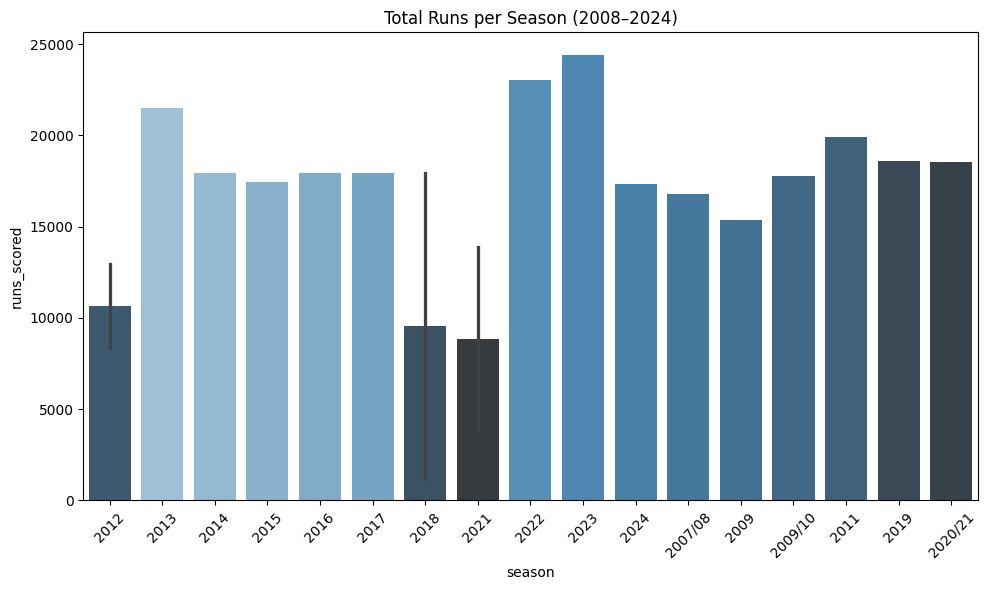

In [7]:
season_runs = combined_df.groupby('season')['runs_scored'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=season_runs, x='season', y='runs_scored', palette='Blues_d')
plt.title("Total Runs per Season (2008–2024)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🏏 Step 4: Compare Batting Styles (Strike Rate vs Boundary %)

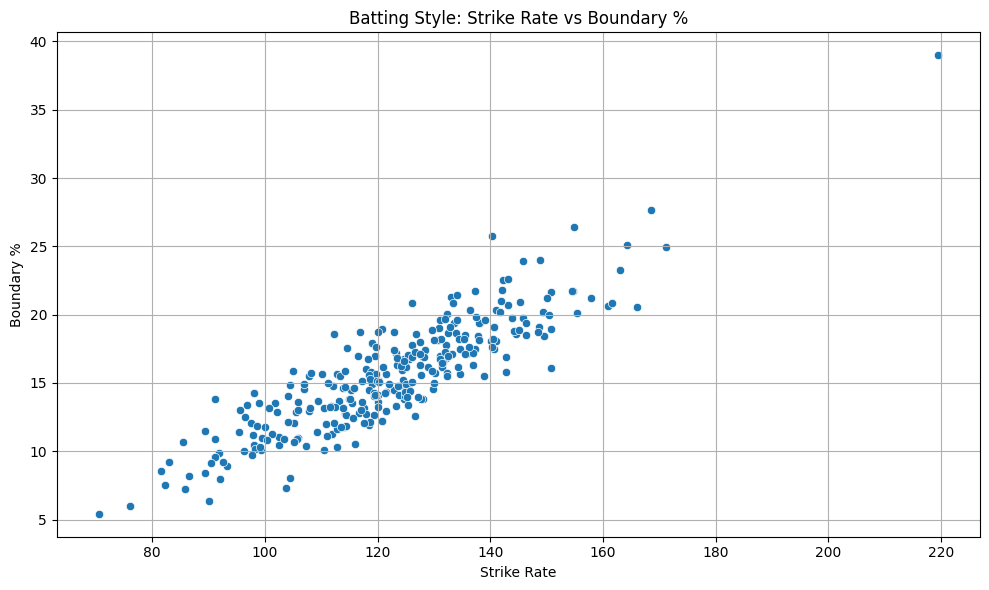

In [8]:
valid_balls = combined_df[combined_df['striker'].notnull()].copy()
valid_balls['is_boundary'] = valid_balls['runs_scored'].apply(lambda x: 1 if x in [4, 6] else 0)

batting_stats = valid_balls.groupby('striker').agg({
    'runs_scored': 'sum',
    'ball_no': 'count',
    'is_boundary': 'sum'
}).reset_index()

batting_stats.rename(columns={'ball_no': 'balls_faced'}, inplace=True)
batting_stats['strike_rate'] = (batting_stats['runs_scored'] / batting_stats['balls_faced']) * 100
batting_stats['boundary_pct'] = (batting_stats['is_boundary'] / batting_stats['balls_faced']) * 100

batting_stats = batting_stats[batting_stats['balls_faced'] >= 100]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=batting_stats, x='strike_rate', y='boundary_pct')
plt.title('Batting Style: Strike Rate vs Boundary %')
plt.xlabel('Strike Rate')
plt.ylabel('Boundary %')
plt.grid(True)
plt.tight_layout()
plt.show()

### 🎯 Step 5: Study Bowling Consistency (Dot %, Economy)

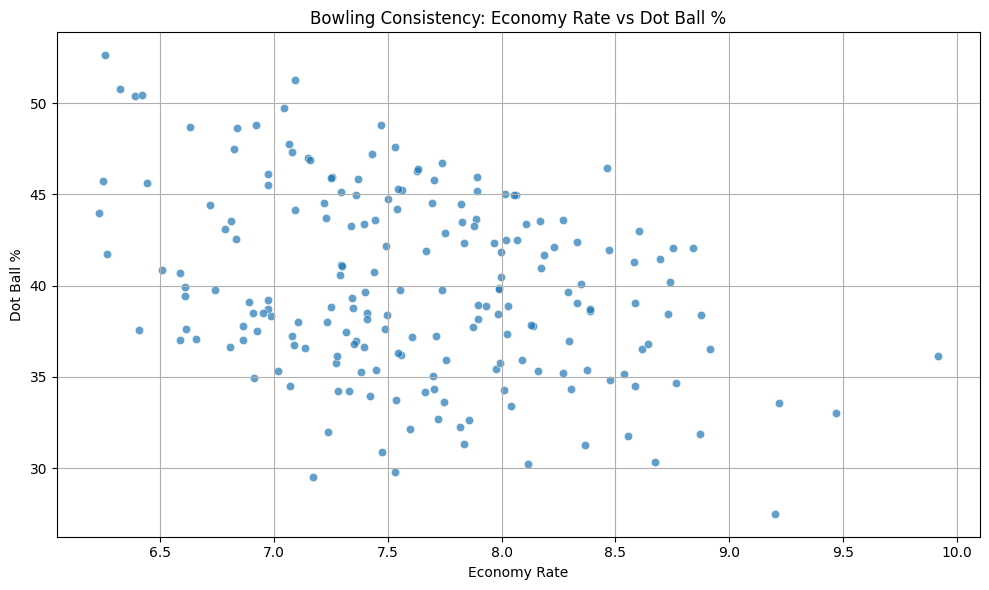

In [9]:
bowler_df = combined_df.copy()
bowler_df['is_dot'] = (bowler_df['runs_scored'] == 0).astype(int)

bowler_stats = bowler_df.groupby('bowler').agg({
    'runs_scored': 'sum',
    'is_dot': 'sum',
    'ball_no': 'count'
}).reset_index()

bowler_stats.rename(columns={'ball_no': 'balls_bowled'}, inplace=True)
bowler_stats['dot_pct'] = (bowler_stats['is_dot'] / bowler_stats['balls_bowled']) * 100
bowler_stats['economy'] = bowler_stats['runs_scored'] / (bowler_stats['balls_bowled'] / 6)

top_bowlers = bowler_stats[bowler_stats['balls_bowled'] > 300]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_bowlers, x='economy', y='dot_pct', alpha=0.7)
plt.title('Bowling Consistency: Economy Rate vs Dot Ball %')
plt.xlabel('Economy Rate')
plt.ylabel('Dot Ball %')
plt.grid(True)
plt.tight_layout()
plt.show()

### ⏱️ Step 6: Overs Performance (Powerplay, Middle, Death)

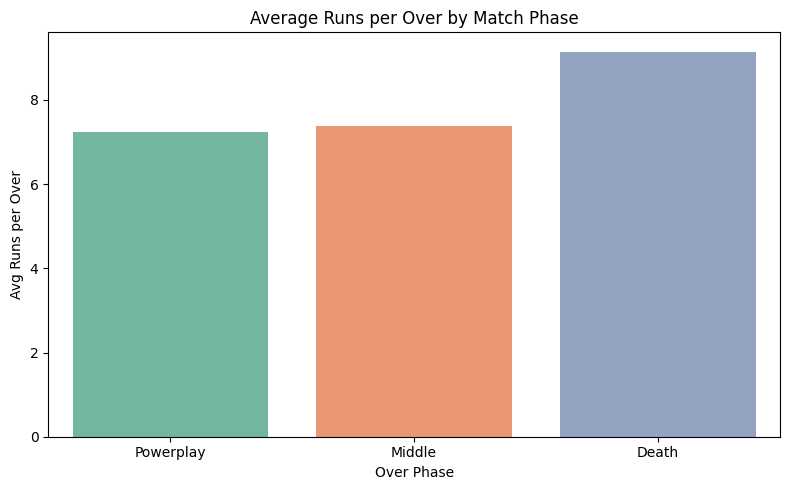

In [10]:
combined_df['over'] = combined_df['ball_no'].astype(str).str.split('.').str[0].astype(int)

combined_df['over_type'] = combined_df['over'].apply(
    lambda x: 'Powerplay' if 1 <= x <= 6 else ('Middle' if 7 <= x <= 15 else ('Death' if 16 <= x <= 20 else 'Other'))
)

combined_df = combined_df[combined_df['over_type'].isin(['Powerplay', 'Middle', 'Death'])]

combined_df['over_type'] = pd.Categorical(
    combined_df['over_type'],
    categories=['Powerplay', 'Middle', 'Death'],
    ordered=True
)

over_stats = combined_df.groupby('over_type')['runs_scored'].mean().reset_index()
over_stats['avg_runs_per_over'] = over_stats['runs_scored'] * 6

plt.figure(figsize=(8, 5))
sns.barplot(data=over_stats, x='over_type', y='avg_runs_per_over', palette='Set2')
plt.title('Average Runs per Over by Match Phase')
plt.xlabel('Over Phase')
plt.ylabel('Avg Runs per Over')
plt.tight_layout()
plt.show()

#### 🎯 Bowling Consistency: Top 10 Economical Bowlers

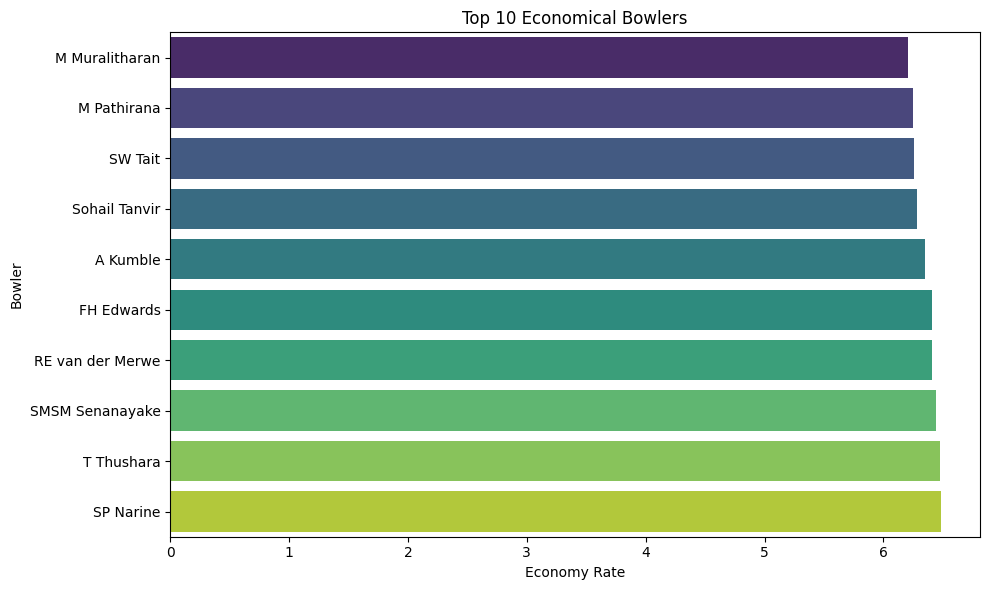

In [11]:
combined_df['is_dot'] = combined_df['runs_scored'].apply(lambda x: 1 if x == 0 else 0)

bowling_stats = combined_df.groupby('bowler').agg(
    runs_scored=('runs_scored', 'sum'),
    balls_bowled=('ball_no', 'count'),
    dot_balls=('is_dot', 'sum')
).reset_index()

bowling_stats['economy'] = bowling_stats['runs_scored'] / (bowling_stats['balls_bowled'] / 6)
bowling_stats['dot_ball_pct'] = (bowling_stats['dot_balls'] / bowling_stats['balls_bowled']) * 100

bowling_stats_filtered = bowling_stats[bowling_stats['balls_bowled'] >= 100]
bowling_stats_sorted = bowling_stats_filtered.sort_values(by='economy')

plt.figure(figsize=(10, 6))
sns.barplot(data=bowling_stats_sorted.head(10), x='economy', y='bowler', palette='viridis')
plt.title("Top 10 Economical Bowlers")
plt.xlabel("Economy Rate")
plt.ylabel("Bowler")
plt.tight_layout()
plt.show()

### 🏟️ Step 7: Compare venue behavior in high-scoring vs low-scoring matches

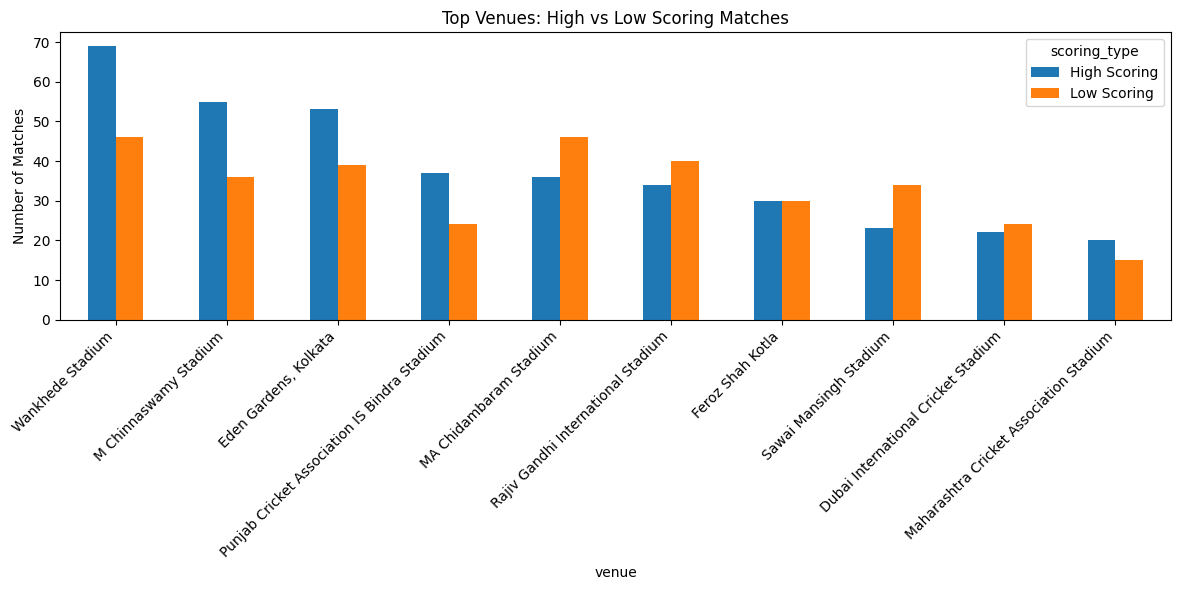

In [12]:
match_runs = ball_df.groupby('match_id')['runs_scored'].sum().reset_index()

venue_info = team_perf_df[['match_id', 'venue']].drop_duplicates()

match_runs = pd.merge(match_runs, venue_info, on='match_id', how='left')

median_score = match_runs['runs_scored'].median()
match_runs['scoring_type'] = match_runs['runs_scored'].apply(
    lambda x: 'High Scoring' if x >= median_score else 'Low Scoring'
)

summary = match_runs.groupby(['venue', 'scoring_type']).size().unstack(fill_value=0)

summary = summary.sort_values('High Scoring', ascending=False).head(10)
summary.plot(kind='bar', figsize=(12, 6))
plt.title('Top Venues: High vs Low Scoring Matches')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 🤖 Step 7: Match-Winner Prediction using Logistic Regression

#### 🧹 Data Preparation & Encoding

In [13]:
ml_df = combined_df.dropna(subset=['match_winner'])

ml_df['target'] = (ml_df['toss_winner'] == ml_df['match_winner']).astype(int)

ml_features = ml_df[['toss_winner', 'toss_decision', 'venue']].copy()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ml_features.columns:
    ml_features[col] = le.fit_transform(ml_features[col])

X = ml_features
y = ml_df['target']

#### 🧪 Model Training and Evaluation

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.5499293886489695

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.50      0.53     24227
           1       0.55      0.60      0.57     24632

    accuracy                           0.55     48859
   macro avg       0.55      0.55      0.55     48859
weighted avg       0.55      0.55      0.55     48859



#### 📊 Confusion Matrix – Classification Evaluation

<Figure size 800x600 with 0 Axes>

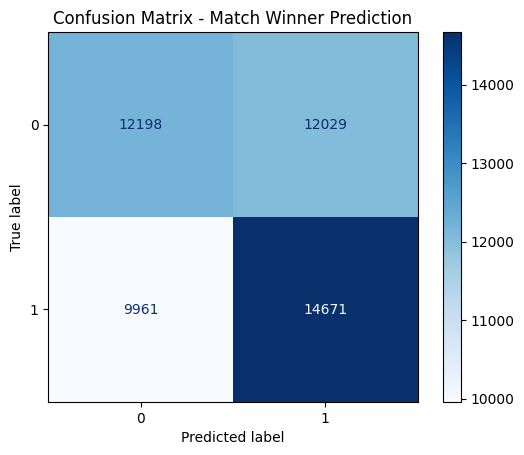

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Match Winner Prediction")
plt.grid(False)
plt.show()

#### 🪄 Feature Influence – Model Interpretation

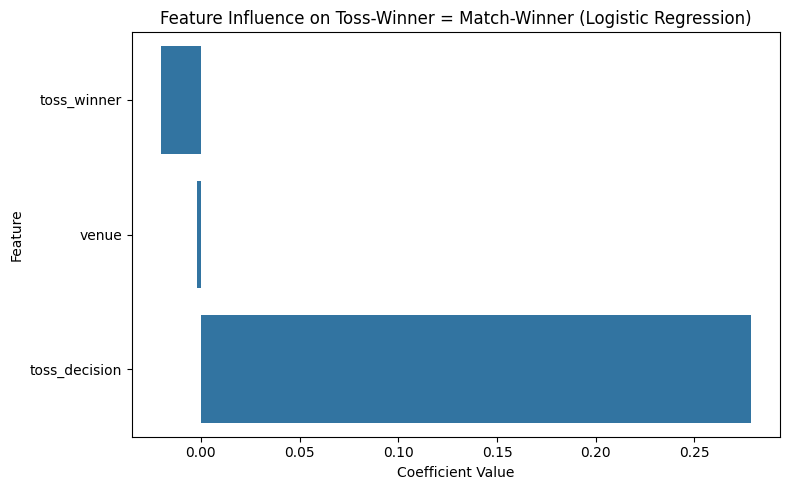

In [16]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=True)

plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Influence on Toss-Winner = Match-Winner (Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#### 📉 ROC Curve Analysis

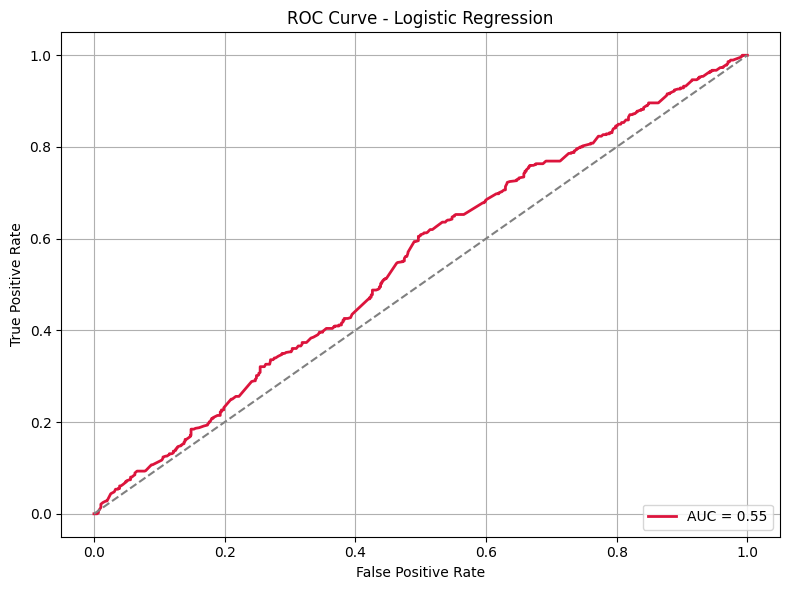

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color='crimson', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## ✅ Final Conclusion

This IPL data analysis from 2008 to 2024 provides a comprehensive understanding of how the game has evolved over the years. Through visual exploration of trends and patterns, several insights emerged:

- **Scoring patterns** show a steady increase over the seasons, indicating an aggressive shift in gameplay.
- **Batting styles** highlight a clear distinction between anchor players and boundary hitters, essential for team composition strategy.
- **Bowling consistency**, measured by dot ball percentage and economy rates, uncovered top-performing bowlers who control the game's pace.
- **Overs-based performance** illustrates the strategic importance of Powerplay and Death overs in match outcomes.
- **Venue-based analysis** reveals how different grounds influence scoring behavior, crucial for team planning and fan expectations.
- The **logistic regression model**, though optional, demonstrates how match outcomes can be partially predicted based on key match features.

Overall, this analysis emphasizes the power of data in uncovering actionable insights in sports, reinforcing how data analytics is revolutionizing cricket strategy and decision-making.